# Figure 12a: C/C vs SLEC-CP

Here we reproduce the left part of Figure 12: C/C vs SLEC-CP

## Load session data

In [57]:
from chi import ssh
import scripts.session as session
import scripts.ssh_helper as ssh_helper

session_data = session.load()
floating_ip = session_data["floating_ip"]
print("Got floating_ip: {}".format(floating_ip))

Got floating_ip: 129.114.108.121


## Experiment

In [58]:
with ssh.Remote(floating_ip) as conn:
    conn.run("cd /home/cc/sc23-mlec/scripts/fig12a && "
             "tmux new-session -d -s fig12a-session 'bash exp.sh &> fig12a.log; tmux kill-session -t fig12a-session'")
    print("Experiments are now running in the background using tmux.")
    print("This can take roughly 3-5 hours. You don't need to keep your laptop on during this process."
              "However, we suggest you don't close this webpage, so that you can connect to this workspace later.")
    

Experiments are now running in the background using tmux.
This can take roughly 3-5 hours. You don't need to keep your laptop on during this process.However, we suggest you don't close this webpage, so that you can connect to this workspace later.


## Wait for results

Experiments are now running in the background using tmux.

You can use the code below to check if the experiments have finished or not:

In [60]:
from chi import ssh
import scripts.session as session
import scripts.ssh_helper as ssh_helper
import time

session_data = session.load()
floating_ip = session_data["floating_ip"]
print("Got floating_ip: {}".format(floating_ip))

print("Checking the status of the experiments....")

with ssh.Remote(floating_ip) as conn:
    curr = int(time.time())
    log_temp_path = "/tmp/tmux_sessions_{}.log".format(curr)
    conn.run("tmux list-sessions &> {}".format(log_temp_path), warn=True)
    conn.get(log_temp_path, log_temp_path)
    with open(log_temp_path, "r") as file:
        tmux_sessions = file.read()
    if "fig12a-session" in tmux_sessions:
        print("Experiments are still running... Please wait....")
    else:
        print("Experiments have finished! You can now fetch results and make plots")

Got floating_ip: 129.114.108.121
Checking the status of the experiments....
Experiments have finished! You can now fetch results and make plots


## Fetch results

After the experiments are finished, you can retrive results from remote server to this container

In [61]:
from chi import ssh
import scripts.session as session
import scripts.ssh_helper as ssh_helper
import time

session_data = session.load()
floating_ip = session_data["floating_ip"]

!mkdir -p data/fig12a
with ssh.Remote(floating_ip) as conn:
    conn.get("/home/cc/mlec-sim/src/results/slec-local-cp-dur-thru.dat", "data/fig12a/slec-local-cp-dur-thru.dat")
    conn.get("/home/cc/mlec-sim/src/results/slec-net-cp-dur-thru.dat", "data/fig12a/slec-net-cp-dur-thru.dat")
    conn.get("/home/cc/mlec-sim/src/results/mlec-c-c-dur-thru.dat", "data/fig12a/mlec-c-c-dur-thru.dat")

## Plotting

We now plot Figure 12a based on experiment results

Plotting Figure 12(a)...
Figure(1830x1500)


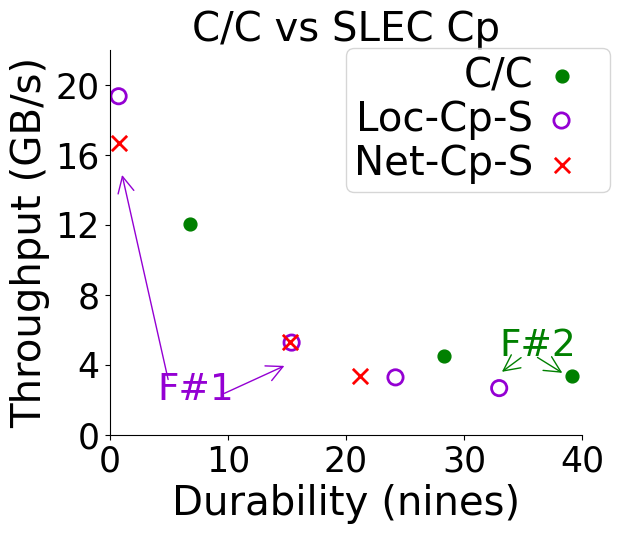

In [1]:
from IPython.display import Image

print("Plotting Figure 12(a)...")
!mkdir -p plots/fig12a
!python3 scripts/fig12a/plot.py plots/fig12a/fig12a.png
Image(filename='plots/fig12a/fig12a.png', width=400)

The figure above contains representative data points that show the same pattern as Figure 12(a) in the paper.